### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lista_edad_altura = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]
lista_alumnos = []
edad = []
altura = []


In [3]:
for alum in lista_edad_altura:
    for i, dato in enumerate(alum):
        if i == 0:
            lista_alumnos.append(dato)
        elif i == 1:
            edad.append(dato)
        elif i == 2:
            altura.append(dato)
print(lista_alumnos,"\n",edad,"\n",altura)

['Clara Piniella', 'Daniel Walker', 'Leonardo Frazzetto', 'Xinru Yang', 'Jorge Garcia', 'Jonathan Suárez', 'Marina Serrano', 'Karina Inche', 'Mary Meza', 'Borja Puig', 'Mauro Garcia-Oliva', 'José Carlos Batista', 'Isabel Palomares', 'Gina Garrido', 'Sonia Cobo', 'Miguel Barquero', 'Nacho Astorga', 'Adrià Gallardo', 'Juan Bayon', 'Nacho Fontal'] 
 [30, 34, 31, 24, 28, 27, 25, 30, 32, 37, 45, 28, 24, 57, 29, 35, 47, 24, 38, 35] 
 [1.66, 1.87, 1.78, 1.6, 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77, 1.7, 1.78, 1.63, 1.73, 1.85, 1.78, 1.7, 1.64, 1.82]


In [4]:
dict_alum = {"nombre": lista_alumnos, "edad":edad, "altura":altura}

In [5]:
df = pd.DataFrame(dict_alum)
df

,nombre,edad,altura
0,Clara Piniella,30,1.66
1,Daniel Walker,34,1.87
2,Leonardo Frazzetto,31,1.78
3,Xinru Yang,24,1.60
4,Jorge Garcia,28,1.79
5,Jonathan Suárez,27,1.86
6,Marina Serrano,25,1.54
7,Karina Inche,30,1.61
8,Mary Meza,32,1.52
9,Borja Puig,37,1.82


In [6]:
X = df["edad"].values
X = X.reshape(-1, 1)
X

array([[30],
       [34],
       [31],
       [24],
       [28],
       [27],
       [25],
       [30],
       [32],
       [37],
       [45],
       [28],
       [24],
       [57],
       [29],
       [35],
       [47],
       [24],
       [38],
       [35]], dtype=int64)

In [7]:
y = df["altura"].values
y

array([1.66, 1.87, 1.78, 1.6 , 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77,
       1.7 , 1.78, 1.63, 1.73, 1.85, 1.78, 1.7 , 1.64, 1.82])

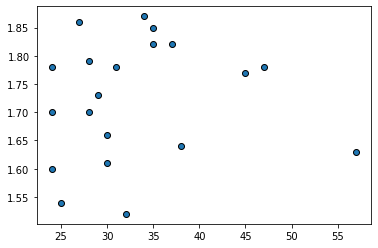

In [8]:
plt.scatter(X,y, edgecolor='black')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.predict(X) 

array([1.71925966, 1.72358011, 1.72033977, 1.71277897, 1.71709943,
       1.71601931, 1.71385908, 1.71925966, 1.72141989, 1.72682046,
       1.73546137, 1.71709943, 1.71277897, 1.74842275, 1.71817954,
       1.72466023, 1.7376216 , 1.71277897, 1.72790057, 1.72466023])

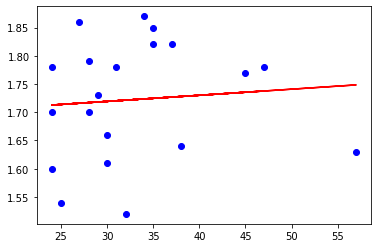

In [12]:
#¿Es una buena técnica para este tipo de problemas? ¿Por qué? 

#Como muestra la tabla, no es una buena técnica para este tipo de problema ya que si los puntos no se encuentran linealmente colocados, el error que se genera puede ser demasiado elevado, como en este caso. 

plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

In [13]:
#¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

lin_reg.score(X, y) * 100

0.758680227148234

In [14]:
predictions = lin_reg.predict(X)

In [15]:
#El MSE es mejor porque los valores que se tocan son pequeños

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 0.08927789699570822
MSE: 0.01066720135908441
RMSE: 0.10328214443496228


In [16]:
#Estipulamos los errores individuales para cada caso
Errors = (y - predictions)
Errors

array([-0.05925966,  0.14641989,  0.05966023, -0.11277897,  0.07290057,
        0.14398069, -0.17385908, -0.10925966, -0.20141989,  0.09317954,
        0.03453863, -0.01709943,  0.06722103, -0.11842275,  0.01182046,
        0.12533977,  0.0423784 , -0.01277897, -0.08790057,  0.09533977])

In [17]:
#Los agregamos al dataframe para mejor visualización
df["Error_regression"] = Errors
df

,nombre,edad,altura,Error_regression
0,Clara Piniella,30,1.66,-0.059260
1,Daniel Walker,34,1.87,0.146420
2,Leonardo Frazzetto,31,1.78,0.059660
3,Xinru Yang,24,1.60,-0.112779
4,Jorge Garcia,28,1.79,0.072901
5,Jonathan Suárez,27,1.86,0.143981
6,Marina Serrano,25,1.54,-0.173859
7,Karina Inche,30,1.61,-0.109260
8,Mary Meza,32,1.52,-0.201420
9,Borja Puig,37,1.82,0.093180


In [18]:
#Representa la matriz de correlación, ¿los datos están correlacionados?
df.drop(columns=["Error_regression"]).corr()

,edad,altura
edad,1.000000,0.087102
altura,0.087102,1.000000


<AxesSubplot:>

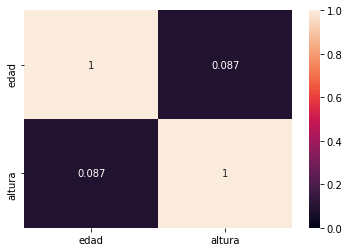

In [19]:
#No están apenas correlacionados
sns.heatmap(df.drop(columns=["Error_regression"]).corr(),vmin=0, vmax=1,annot=True)

In [20]:
#¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

#Tanto si la edad, como si la altura se multiplican por 2. La pendiente se mantendrá igual y cambiará únicamente la secante. Por lo que, la correlación se mantiene igual, y el error total, así como los parciales, también se mantendrán iguales.